# Python Time Series Crash Course_Part 3: TS Decomposition, Add/Multi, 3 Main Components

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose

# Two Models for TS Components Combination
## Additive Model
An additive model is linear where changes over time are consistently made by the same
amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of
cycles) and amplitude (height of cycles).

$$y(t) = Level + Trend + Seasonality + Noise$$

## Multipicative Model
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or
decrease over time. A nonlinear trend is a curved line. A nonlinear seasonality has an increasing
or decreasing frequency and/or amplitude over time.

$$y(t) = Level * Trend * Seasonality * Noise$$



# Auto Time Series Decomposition
Real-world problems are messy and noisy 
- There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. 
- There may be non-repeating cycles mixed in with the repeating seasonality components. 

Nevertheless, these
abstract models provide a simple framework that you can use to analyze your data and explore
ways to think about and forecast your problem.

The **Statsmodels** library provides an implementation of the naive, or classical, decomposition method in a function called
$$seasonal decompose()$$. 


It requires that you specify whether the model is additive or multiplicative.

The
seasonal decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

In [ ]:
# Template for Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
series = ...
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

For example, the snippet agove shows how to decompose a series into 
- trend, seasonal, and residual components assuming an additive model. 
- The result object provides access to the trend and seasonal series as arrays. 
- It also provides access to the residuals, 

### Residual, which are the time series after the trend, and seasonal components are removed. 

- Finally, the original or observed data is also stored.

In [ ]:
# Template for plotting
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ...
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

#### Look at above. These four time series can be plotted directly from the result object by calling the plot() function. For example:

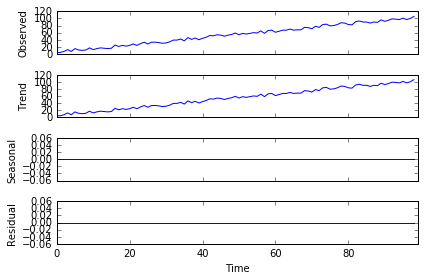

In [1]:
# additive decompose a contrived additive time series
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

## How to Interpret

- We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

- We can see that the entire series was taken as the trend component and that there was no seasonality.

- We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend

- The naive decomposition method is a simple one

- There are more advanced decompositions available, like Seasonal and Trend decomposition using **Loess or STL decomposition**

- Caution and healthy skepticism is needed when using automated decomposition methods.

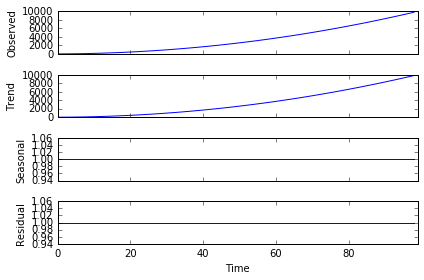

In [2]:
# Here is the Multiplicative a quadratic one

# multiplicative decompose a contrived multiplicative time series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

## How to transform
Exponential changes can be made linear by data transforms. In this case, 
- a quadratic trend can be made linear by taking the square root. 
- An exponential growth in seasonality may be made linear by taking the natural logarithm.

# Real Example: Airline Passenger Data Set

In [ ]:
# The code was removed by DSX for sharing.

/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


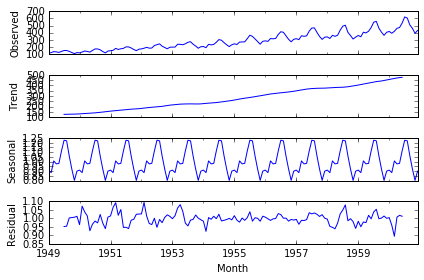

In [2]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = Series.from_csv(body, header=0)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

We can see that the trend and seasonality information extracted from the series does seem reasonable.
The residuals are also interesting, showing 

#### periods of high variability in the early and later years of the series.

# 1st Component Breakdown: Trend
## Definition
#### In general, a systematic change in a time series that does not appear to be periodic is known as a trend.

## Types of Trend
There are all kinds of trends. Two general classes that we may think about are:

- $$Deterministic Trends$$ 

These are trends that consistently increase or decrease.
- $$Stochastic Trends$$ 

These are trends that increase and decrease inconsistently.

In general, deterministic trends are easier to identify and remove, but the methods discussed in this tutorial can still be useful for stochastic trends. We can think about trends in terms of
their scope of observations.

- $$Global Trends$$: These are trends that apply to the whole time series.
- $$Local Trends$$: These are trends that apply to parts or subsequences of a time series.

Generally, global trends are easier to identify and address.

## Add or Remove Trend?
### Remove for Forecast
Specifically, a trend can be removed from your time series data (and data in the future) as a
data preparation and cleaning exercise. This is common when using statistical methods for time
series forecasting, but does not always improve results when using machine learning models.

### Add for ML
Alternately, a trend can be added, either directly or as a summary, as a new input variable to
the supervised learning problem to predict the output variable.

## Detrend by Differencing
This approach works well for data with **a linear trend**. If the trend is quadratic (the change
in the trend also increases or decreases), then a dierence of the already-dierenced dataset can
be taken, a second level of dierencing.

### Real Case: Shampoo Data Set

Perhaps the simplest method to detrend a time series is by dierencing. Specically, a new
series is constructed where the value at the current time step is calculated as the dierence
between the original observation and the observation at the previous time step.

$$value(t) = observation(t) - observation(t - 1)$$

This has the eect of removing a trend from a time series dataset. We can create a new
dierence dataset in Python by implementing this directly. A new list of observations can be
created.


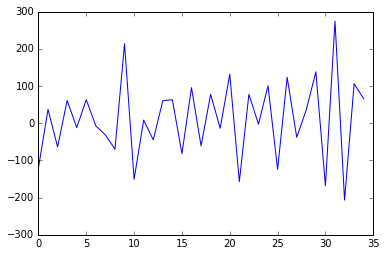

In [4]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# detrend a time series using differencing
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(body, header=0, parse_dates=[0], index_col=0,
    squeeze=True, date_parser=parser)
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()



Running the example creates the new detrended dataset and then plots the time series.
Because no dierence value can be created for the rst observation (there is nothing for it to be
subtracted from), the new dataset contains one less record

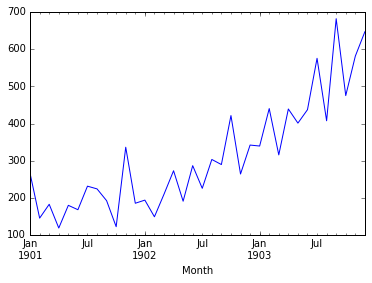

In [8]:
# Original One
series.plot()
pyplot.show()

#### Good appoarch to add one input for Supervised Learning
Because dierencing only requires the observation at the previous time step, it can easily be applied to
unseen out-of-sample data to either pre-process or provide an additional input for supervised
learning.

## Detrend by ML Model Fitting

In addition to being used as a trend identication tool, these t models can also be used to
detrend a time series. For example, 

#### a linear model can be fit on the time index to predict the observation. 

This dataset would look as follows:

In [ ]:
X, y
1, obs1
2, obs2
3, obs3
4, obs4
5, obs5


The predictions from this model will form a straight line that can be taken as the trend
line for the dataset. These predictions can also be subtracted from the original time series to
provide a detrended version of the dataset.

$$ value(t) = observation(t) - prediction(t) $$

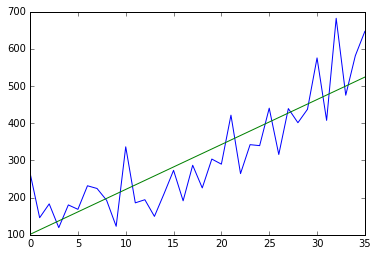

In [13]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(body, header=0, parse_dates=[0], index_col=0,
    squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()


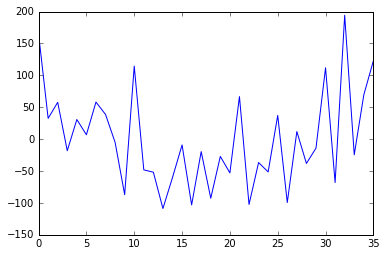

In [12]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

Again, we can see that this approach has eectively detrended the dataset. There may be a
$$parabola$$


in the residuals, suggesting that perhaps a polynomial t may have done a better job.

# 2nd Component Breakdown: Seasonality
Time series datasets can contain a seasonal component. This is a cycle that repeats over time,
such as monthly or yearly. This repeating cycle may obscure the signal that we wish to model
when forecasting, and in turn may provide a strong signal to our predictive models.

## Definition
A repeating pattern within each year is known as seasonal variation, although the
term is applied more generally to repeating patterns within any fixed period.

## Types of Seasonality
- Time of Day.
- Daily.
- Weekly.
- Monthly.
- Yearly.
#### As such, identifying whether there is a seasonality component in your time series problem is subjective. 

The simplest approach to determining if there is an aspect of seasonality is to plot
and review your data, perhaps at dierent scales and with the addition of trend lines

## Removing Seasonality
Once seasonality is identied, it can be modeled. The model of seasonality can be removed from
the time series. 

This process is called $$Seasonal-Adjustment$$, or 

$$Deseasonalizing$$

- A time series where the seasonal component has been removed is called **seasonal stationary**. 

- A time series with a clear seasonal component is referred to as **non-stationary**.

## Seasonal Adjustment with Differencing
A simple way to correct for a seasonal component is to use dierencing. 

If there is a seasonal
component at the level of one week, then we can remove it on an observation today by subtracting
the value from last week. 

In the case of the Minimum Daily Temperatures dataset, it looks like
we have 

- a seasonal component each year showing swing from summer to winter.

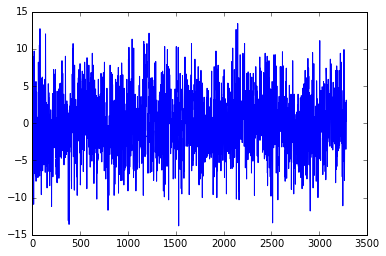

In [15]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-minimum-temperatures.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# deseasonalize a time series using differencing
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()



- There are two leap years in our dataset (1984 and 1988). 
- They are not explicitly handled;
- This means that observations in March 1984 onwards the oset are wrong by one day, and after March 1988, the osets are wrong by two days. 
- One option is to update the code example to be leap-day aware.

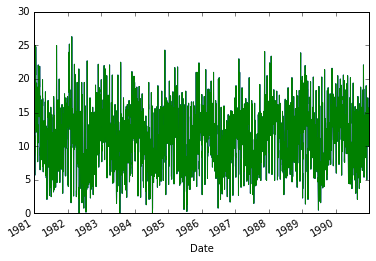

In [17]:
series.plot()
pyplot.show()

## Assume Stable, resample from days to months
Another option is to consider that the temperature within any given period of the year
is probably stable. Perhaps over a few weeks. We can shortcut this idea and consider all
temperatures within a calendar month to be stable. An improved model may be to subtract the
average temperature from the same calendar month in the previous year, rather than the same
day. We can start o by resampling the dataset to a monthly average minimum temperature.

Date
1981-01-31    15.729032
1981-02-28    15.864286
1981-03-31    12.893548
1981-04-30    11.346667
1981-05-31     9.741935
1981-06-30     9.150000
1981-07-31     8.758065
1981-08-31     9.151613
1981-09-30    11.473333
1981-10-31    10.664516
1981-11-30    11.260000
1981-12-31    12.503226
1982-01-31    14.396774
Freq: M, Name: Temp, dtype: float64


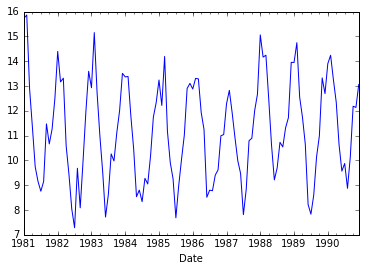

In [19]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-minimum-temperatures.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 

# calculate and plot monthly average
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

Next, we can use the monthly average minimum temperatures from the same month in the
previous year to adjust the daily minimum temperature dataset. Again, we just skip the rst

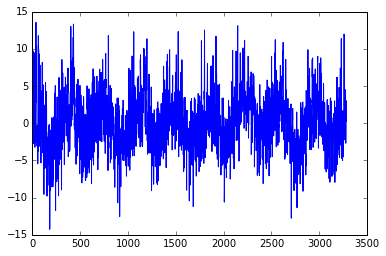

In [24]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

The edge of calendar months provides a hard boundary that may not make sense for
temperature data. More 
exible approaches that take the average from one week either side of
the same date in the previous year may again be a better approach. Additionally, there is likely
to be seasonality in temperature data at multiple scales that may be corrected for directly or
indirectly, such as:
- Day level.
- Multiple day level, such as a week or weeks.
- Multiple week level, such as a month.
- Multiple month level, such as a quarter or season.


## Seasonal Adjustment with Modeling

We can model the seasonal component directly, then subtract it from the observations. 

The seasonal component in a given time series is likely a $$sine-wave$$ over a generally fixed period and
amplitude. 

This can be approximated easily using a **curve-fitting method**


Once fit, the model can then be used to calculate a seasonal component for any time index.
In the case of the temperature data, the time index would be the day of the year. We can then
estimate the seasonal component for the day of the year for any historical observations or any
new observations in the future. The curve can then be used as a new input for modeling with
supervised learning algorithms, or subtracted from observations to create a seasonally adjusted
series.

Let's start o by fitting a curve to the Minimum Daily Temperatures dataset. 

- The NumPy library provides the 

$$polyfit()$$

function1 that can be used to fit a polynomial of a chosen order to a dataset. First, we can create a dataset of time index (day in this case) to observation. 
- We could take a single year of data or all the years. Ideally, we would try both and see which model resulted in a better fit. 
- We could also smooth the observations using a **movingaverage** centered on each value. This too may result in a model with a better t.

In [26]:
# model seasonality with a polynomial model
from pandas import Series
from matplotlib import pyplot
from numpy import polyfit


body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-minimum-temperatures.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 


# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

Coefficients: [ -1.17308000e-08   9.30253946e-06  -2.15977594e-03   1.19147966e-01
   1.38980178e+01]


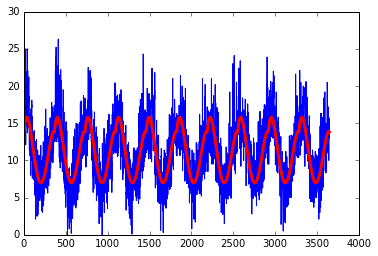

In [28]:
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

#### Running the example creates the dataset, ts the curve, predicts the value for each day in the dataset, and then plots the resulting seasonal model over the top of the original dataset.

The curve appears to be a good t for the seasonal structure in the dataset. We can now use this model to create a seasonally adjusted version of the dataset. The complete example is
listed below.

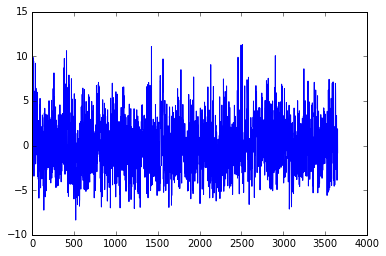

In [30]:
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

# 3rd Component Breakdown: Stationarity
## Definition

- Time series is different from more traditional classiffcation and regression predictive modeling problems. 
- The temporal structure adds an order to the observations. 
- This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically. 
- For example, when modeling, there are assumptions that the summary statistics of observations are consistent. 
- In time series terminology, we refer to this expectation as the time series being $$stationary$$ 



These assumptions can be easily violated in time series by the addition
of a trend, seasonality, and other time-dependent structures.

## Types of Stationary Time Series
- Stationary Process: A process that generates a stationary series of observations.
- Stationary Model: A model that describes a stationary series of observations.
- Trend Stationary: A time series that does not exhibit a trend.
- Seasonal Stationary: A time series that does not exhibit seasonality.
- Strictly Stationary: A mathematical denition of a stationary process, specically that the joint distribution of observations is invariant to time shift.

## Add or Remove Stationarity
The suggestion here is to treat properties of a time series being stationary or not as another
source of information that can be used in feature engineering and feature selection on your time
series problem when using machine learning methods.

### Checking by Summary Statistics


In [31]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='airline-passengers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# calculate statistics of partitioned time series data
from pandas import Series
series = Series.from_csv(body, header=0)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


#### Running the example, we can see the mean and variance look very dierent. We have a non-stationary time series.

Let's take one step back and check if assuming a Gaussian distribution makes
sense in this case by plotting the values of the time series as a histogram.

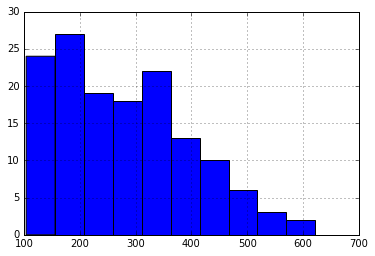

In [33]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='airline-passengers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


# plot a histogram of a time series
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
series.hist()
pyplot.show()

Running the example shows that indeed the distribution of values does not look like a
Gaussian, therefore the mean and variance values are less meaningful. This squashed distribution
of the observations may be another indicator of a non-stationary time series.

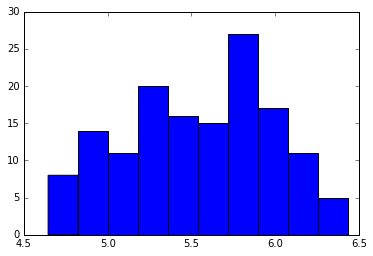

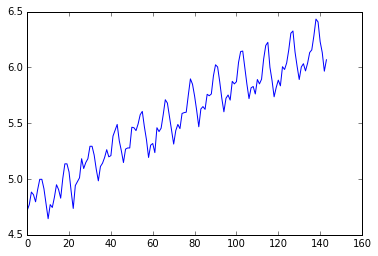

In [34]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='airline-passengers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# histogram and line plot of log transformed time series
from pandas import Series
from matplotlib import pyplot
from numpy import log
series = Series.from_csv(body, header=0)
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

#### Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution of values.

### Checking by Statistic Testing: Augmented Dickey-Fuller test

In [37]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-total-female-births.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


# calculate stationarity test of time series data
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_csv(body, header=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	5%: -2.870
	1%: -3.449
	10%: -2.571


Running the example prints the test statistic value of -4. The more negative this statistic,
the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of
the output, we get a look-up table to help determine the ADF statistic. We can see that our
statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a signicance level of less than 1%
(i.e. a low probability that the result is a statistical 
uke). Rejecting the null hypothesis means
that the process has no unit root, and in turn that the time series is stationary or does not have
time-dependent structure.

### Let's look at another dataset

In [39]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='airline-passengers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# calculate stationarity test of time series data
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_csv(body, header=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))





ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	5%: -2.884
	1%: -3.482
	10%: -2.579


Running the example gives a dierent picture than the above. The test statistic is positive,
meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing
the test statistic to the critical values, it looks like we would have to accept the null hypothesis
that the time series is non-stationary and does have time-dependent structure.

## Log then Check again

In [40]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='airline-passengers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# calculate stationarity test of log transformed time series data
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = Series.from_csv(body, header=0)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	5%: -2.884
	1%: -3.482
	10%: -2.579


Running the example shows a negative value for the test statistic. We can see that the value
is larger than the critical values, again, meaning that we can accept the null hypothesis and in
turn that the time series is non-stationary.